In [1]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Bidirectional, Dropout, GRU
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

2024-12-18 07:57:10.284800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Загрузим датесет IMDb, который уже встроен в Keras. Поскольку мы не хотим иметь данные 
обучения и тестирования в пропорции 50/50, мы сразу же объединим эти данные после 
загрузки для последующего разделения в пропорции 80/20:

In [2]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data,
                                    testing_targets) = imdb.load_data(num_words=10000)

data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets),
                         axis=0)

Разделяем данные

In [3]:
split_at = int(len(data) * 0.8)
X_train = data[:split_at]
y_train = targets[:split_at]
X_test = data[split_at:]
y_test = targets[split_at:]

Приводим последовательности к одинаковой длине

In [4]:
max_review_length = 500
X_train = pad_sequences(X_train,
                        maxlen=max_review_length)
X_test = pad_sequences(X_test,
                       maxlen=max_review_length)

Задаем архитектуру сети

In [5]:
top_words = 10000
embedding_vecor_length = 32

In [6]:
model_LTSM_lab = Sequential()
model_LTSM_lab.add(Embedding(top_words, embedding_vecor_length,
                             input_length=max_review_length))
model_LTSM_lab.add(LSTM(100))
model_LTSM_lab.add(Dense(1, activation='sigmoid'))
model_LTSM_lab.compile(loss='binary_crossentropy', optimizer='adam',
                       metrics=['accuracy'])
print(model_LTSM_lab.summary())
history_LTSM = model_LTSM_lab.fit(X_train, y_train, validation_data=(X_test, y_test),
                                  epochs=3, batch_size=64)
scores = model_LTSM_lab.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2024-12-18 07:32:32.874778: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-18 07:32:32.875155: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-18 07:32:32.875213: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-18 07:32:32.875537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-18 07:32:32.875732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-18 07:32:34.147154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore th

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3


2024-12-18 07:32:34.800735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-18 07:32:34.802402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-18 07:32:34.803539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - ETA: 0s - loss: 0.4400 - accuracy: 0.7926

2024-12-18 07:34:06.143579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-18 07:34:06.145442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-18 07:34:06.147256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - 98s 144ms/step - loss: 0.4400 - accuracy: 0.7926 - val_loss: 0.3319 - val_accuracy: 0.8623
Epoch 2/3
257/625 [===========>..................] - ETA: 52s - loss: 0.2665 - accuracy: 0.8934

KeyboardInterrupt: 

In [ ]:
model_CNN_LTSM_lab = Sequential()
model_CNN_LTSM_lab.add(Embedding(top_words, embedding_vecor_length,
                                 input_length=max_review_length))
model_CNN_LTSM_lab.add(Conv1D(filters=32, kernel_size=3, padding='same',
                              activation='relu'))
model_CNN_LTSM_lab.add(MaxPooling1D(pool_size=2))
model_CNN_LTSM_lab.add(LSTM(100))
model_CNN_LTSM_lab.add(Dense(1, activation='sigmoid'))

model_CNN_LTSM_lab.compile(loss='binary_crossentropy', optimizer='adam',
                           metrics=['accuracy'])
print(model_CNN_LTSM_lab.summary())
history_CNN_LTSM = model_CNN_LTSM_lab.fit(X_train, y_train, validation_data=(X_test, y_test),
                                          epochs=3, batch_size=64)
scores = model_CNN_LTSM_lab.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2024-12-18 07:08:29.739009: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-18 07:08:29.739205: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-18 07:08:29.739232: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-18 07:08:29.739518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-18 07:08:29.739731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-18 07:08:31.201631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore th

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
__________________________________________________

2024-12-18 07:08:31.885234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-18 07:08:31.887294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-18 07:08:31.888543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - ETA: 0s - loss: 0.3693 - accuracy: 0.8297

2024-12-18 07:10:15.238634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-18 07:10:15.240237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-18 07:10:15.241879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - 109s 160ms/step - loss: 0.3693 - accuracy: 0.8297 - val_loss: 0.2696 - val_accuracy: 0.8927
Epoch 2/3
625/625 [==============================] - 101s 162ms/step - loss: 0.2114 - accuracy: 0.9189 - val_loss: 0.2605 - val_accuracy: 0.8956
Epoch 3/3
625/625 [==============================] - 97s 156ms/step - loss: 0.1601 - accuracy: 0.9413 - val_loss: 0.2460 - val_accuracy: 0.9005
Accuracy: 90.05%


In [7]:
model_CNN_LTSM_modern = Sequential()
model_CNN_LTSM_modern.add(
    Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_CNN_LTSM_modern.add(Bidirectional(LSTM(100)))
model_CNN_LTSM_modern.add(Dropout(0.5))
model_CNN_LTSM_modern.add(Dense(1, activation='sigmoid'))

model_CNN_LTSM_modern.compile(loss='binary_crossentropy', optimizer='adam',
                              metrics=['accuracy'])
print(model_CNN_LTSM_modern.summary())

early_stopping = EarlyStopping(
    monitor='val_loss', mode='min', min_delta=0.01, patience=2, restore_best_weights=False)

history_CNN_LTSM_modern = model_CNN_LTSM_modern.fit(X_train, y_train, validation_data=(X_test, y_test),
                                                    epochs=3, batch_size=64, callbacks=[early_stopping])
scores = model_CNN_LTSM_modern.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2024-12-18 07:43:51.379230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-18 07:43:51.382272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-18 07:43:51.384565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              106400    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 426,601
Trainable params: 426,601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3


2024-12-18 07:43:52.922531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-18 07:43:52.925773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-18 07:43:52.928400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5027

2024-12-18 07:48:07.892768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-18 07:48:07.894271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-18 07:48:07.895645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - 268s 416ms/step - loss: nan - accuracy: 0.5027 - val_loss: nan - val_accuracy: 0.4973
Epoch 2/3
625/625 [==============================] - 154s 246ms/step - loss: nan - accuracy: 0.5007 - val_loss: nan - val_accuracy: 0.4973
Accuracy: 49.73%


In [ ]:
model_CNN_GRU = Sequential()
model_CNN_GRU.add(
    Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
# Увеличим фильтры для более глубокого анализа
model_CNN_GRU.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_CNN_GRU.add(MaxPooling1D(pool_size=2))
# Dropout и recurrent_dropout для регуляризации
model_CNN_GRU.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model_CNN_GRU.add(Dense(1, activation='sigmoid'))

model_CNN_GRU.compile(loss='binary_crossentropy', optimizer='adam',
                      metrics=['accuracy'])
print(model_CNN_GRU.summary())

early_stopping_gru = EarlyStopping(
    monitor='val_loss', mode='min', min_delta=0.01, patience=2, restore_best_weights=False)

history_GRU = model_CNN_GRU.fit(X_train, y_train, validation_data=(X_test, y_test),
                                epochs=5, batch_size=64, callbacks=[early_stopping_gru])
scores = model_CNN_GRU.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2024-12-18 07:57:34.176588: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-18 07:57:34.177193: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-18 07:57:34.177325: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-18 07:57:34.178335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-18 07:57:34.179083: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 496, 64)           10304     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 248, 64)          0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 128)               74496     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 404,929
Trainable params: 404,929
Non-trainable params: 0
__________________________________________________

2024-12-18 07:57:41.919695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-18 07:57:42.667392: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_14.


In [9]:
import matplotlib.pyplot as plt


def plot_model_comparison(histories, model_names=None):
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(histories))]

    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], '--',
                 label=f'{model_names[i]} - Training Loss')
        plt.plot(history.history['val_loss'],
                 label=f'{model_names[i]} - Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Comparison of Training and Validation Loss')
    plt.legend()
    plt.show()

    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], '--',
                 label=f'{model_names[i]} - Training Accuracy')
        plt.plot(history.history['val_accuracy'],
                 label=f'{model_names[i]} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Training and Validation Accuracy')
    plt.legend()
    plt.show()

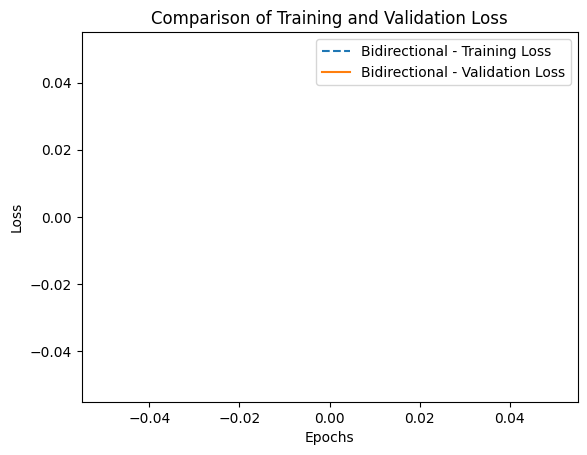

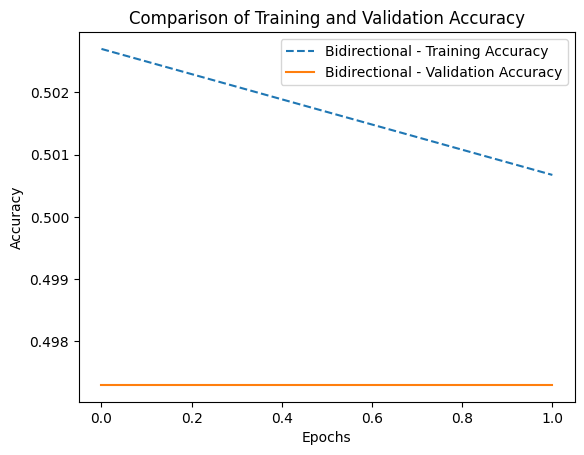

In [10]:
plot_model_comparison([history_CNN_LTSM_modern], ["Bidirectional"])

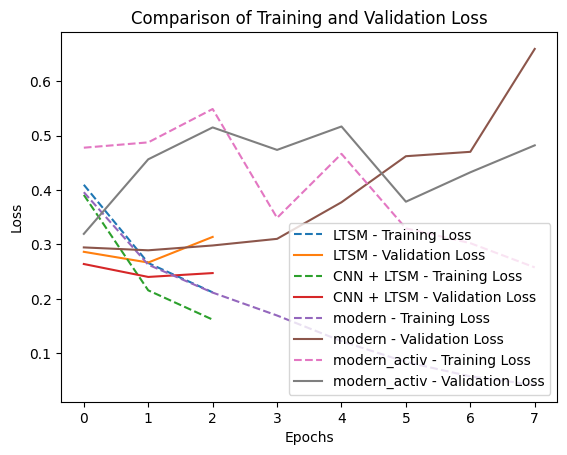

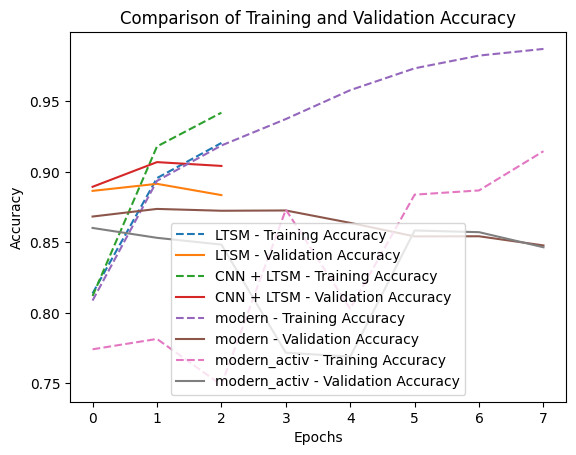

In [ ]:
plot_model_comparison(histories=[history_LTSM, history_CNN_LTSM, history_CNN_LTSM_modern, history_GRU], model_names=[
                      'LTSM', 'CNN + LTSM', 'Bidirect', 'GRU'])

In [ ]:
predictions_model1 = model_CNN_LTSM_modern.predict(X_test, verbose=1)
predictions_model2 = model_CNN_LTSM_lab.predict(X_test, verbose=1)

ensemble_predictions = (predictions_model1 + predictions_model2) / 2
ensemble_predictions = (ensemble_predictions > 0.5).astype(
    int)

2024-12-18 06:00:48.770907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-18 06:00:48.772647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-18 06:00:48.773997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 8s 24ms/step


In [ ]:
word_index = imdb.get_word_index()


def preprocess_text(text, max_review_length=500):
    tokens = [word_index.get(word, 0) for word in text.lower().split()]

    padded_sequence = pad_sequences([tokens], maxlen=max_review_length)
    return padded_sequence


def predict_ensemble(text):
    processed_text = preprocess_text(text)

    pred1 = float(model_CNN_LTSM_modern.predict(processed_text, verbose=1))
    pred2 = float(model_CNN_LTSM_lab.predict(processed_text, verbose=1))

    ensemble_pred = float((pred1 + pred2) / 2)
    if ensemble_pred > 0.5:
        return f"Отзыв положительный с вероятностью - {ensemble_pred}\nРезультат первой модели - {pred1:.4f}, результат второй модели - {pred2:4f}"
    else:
        return f"Отзыв отрицательный с вероятностью - {ensemble_pred}\nРезультат первой модели - {pred1:.4f}, результат второй модели - {pred2:4f}"

In [ ]:
text = input("Напишите свой отзыв")
print(predict_ensemble(text))

1/1 [==============================] - 0s 46ms/step
Отзыв отрицательный с вероятностью - 0.18756010755896568
Результат первой модели - 0.2717, результат второй модели - 0.103449


In [ ]:
texts = [
    "The movie was fantastic and I enjoyed every moment of it.",
    "This was the worst film I have ever seen, it was boring and dull.",
    "An average movie with decent acting but a predictable plot."
    "I was utterly disappointed by this film. The plot was nonsensical, and it dragged on interminably. Characters were underdeveloped and unrelatable, making it impossible to connect with their struggles. The acting seemed forced and lacked authenticity, leaving me disengaged. The special effects were disappointing as well, failing to impress. I found myself checking my watch repeatedly, longing for it to end. Overall, it was a tedious experience that wasted my time. I wouldn’t recommend it to anyone looking for quality entertainment."
    "I absolutely loved this film! From the moment it started, I was captivated by the breathtaking visuals and gripping storyline. The characters were richly developed, each bringing depth and authenticity to the story. The acting was phenomenal, making every emotion feel real and impactful. The cinematography was stunning, beautifully capturing every moment. The soundtrack perfectly complemented the narrative, enhancing the emotional experience. I left the theater feeling inspired and fulfilled. This is a must-watch for anyone who appreciates powerful storytelling and exceptional filmmaking!"
]

# Тестирование
for text in texts:
    result = predict_ensemble(text)
    print(f"Text: {text}\nPrediction: {result}\n")

1/1 [==============================] - 0s 43ms/step
Text: The movie was fantastic and I enjoyed every moment of it.
Prediction: Отзыв отрицательный с вероятностью - 0.24411112070083618
Результат первой модели - 0.1413, результат второй модели - 0.346898

1/1 [==============================] - 0s 61ms/step
Text: This was the worst film I have ever seen, it was boring and dull.
Prediction: Отзыв положительный с вероятностью - 0.7102465927600861
Результат первой модели - 0.7768, результат второй модели - 0.643731

1/1 [==============================] - 0s 50ms/step
Text: An average movie with decent acting but a predictable plot.
Prediction: Отзыв отрицательный с вероятностью - 0.36581631004810333
Результат первой модели - 0.2661, результат второй модели - 0.465536

